Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers?

Now Find the number of posts these handles have done in the previous 3 days.

Depict this information using a suitable graph.

In [98]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
from collections import OrderedDict 
import time
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
driver = webdriver.Chrome(executable_path="/path/to/chromedriver")
driver.maximize_window()
driver.get('https://www.instagram.com/')

username = 'royrishi316'
password = 'Sb04052003'

wait = WebDriverWait(driver, 10)

C:\Users\SHIBAYAN BISWAS\AppData\Local\Temp\ipykernel_11628\520147070.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="/path/to/chromedriver")


In [100]:
def LogIn(username, password):
    try :
        #locating username textbox and sending username
        user_name = wait.until(EC.presence_of_element_located((By.NAME, 'username')))
        user_name.send_keys(username)
        #locating password box and sending password
        pass_word = wait.until(EC.presence_of_element_located((By.NAME, 'password')))
        pass_word.send_keys(password)
        #locating login button 
        button = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="loginForm"]/div[1]/div[3]/button/div')))
        button.submit()
        
    except TimeoutException :
        pass
        

#Login to your Instagram Handle
LogIn(username, password)

In [101]:
wait.until(EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Not Now')]"))).click()
wait.until(EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Not Now')]"))).click()

In [89]:
# Open the top 10 handles and find the top 5 which have the highest number of followers
handles_list = ['dilsefoodie', 'foodtalkindia', 'vellorefoodreviews', 'food.darzee', 'yourfoodlab', 'usa.explores', 'food_impramation', 'foodnetwork', 'foodinsider', 'foodiesfeature']

In [102]:
def search(string, index):
    search_btn = driver.find_elements(By.CLASS_NAME, '_aacl._aacp._aacu._aacx._aada')[index]
    search_btn.click()
    search_box = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, '[aria-label="Search input"]')))
    search_box.send_keys(string)
    result = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, '_abm4')))
    result.click()
    time.sleep(3)
    if index == 1:
        driver.refresh()
    time.sleep(3)

In [32]:
dic = {}

index = 0
for i in handles_list:
    search(i, index)
    time.sleep(2)
    followers = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_ac2a')))[1]
    dic[i] = int(followers.get_attribute('title').replace(',' , ''))
    index = 1
    
count = 0
result = OrderedDict()
for i in sorted(dic, key = dic.get, reverse = True):
    result[i] = dic[i]
    count += 1
    if(count >= 5):
        break

In [33]:
for i in result:
    print(i, result[i])

foodnetwork 12756561
foodinsider 2523722
yourfoodlab 2328830
dilsefoodie 1076603
foodtalkindia 309312


In [34]:
# Return to the home page
driver.find_element(By.CLASS_NAME, '_aacl._aacp._aacu._aacx._aada').click()

In [91]:
# Find the number of posts these handles have done in the previous 3 days
def post_count(day):    # returns the number of posts in n days
    first_post = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, '_aagw')))
    first_post.click()
    
    count = 0
    while True:
        date_element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, '_aaqe')))
        date_string = date_element.get_attribute('datetime')
        date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
        if (datetime.now() - date).days > day :
            break
        else :
            count += 1
        next_button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, '_aaqg._aaqh')))
        next_button.click()
    close = driver.find_element(By.XPATH, '/html/body/div[2]/div/div/div/div[2]/div/div/div[1]/div/div[2]/div')
    close.click()
    return count

In [92]:
dic = {}
handles = ['foodnetwork', 'foodinsider', 'yourfoodlab', 'dilsefoodie', 'foodtalkindia']

index = 0
for i in handles:
    search(i, index)
    time.sleep(2)
    count = post_count(3)
    dic[i] = count
    index = 1

In [93]:
for i in dic:
    print(i, dic[i])

foodnetwork 59
foodinsider 5
yourfoodlab 4
dilsefoodie 4
foodtalkindia 6


In [94]:
# Return to the home page
driver.find_element(By.CLASS_NAME, '_aacl._aacp._aacu._aacx._aada').click()

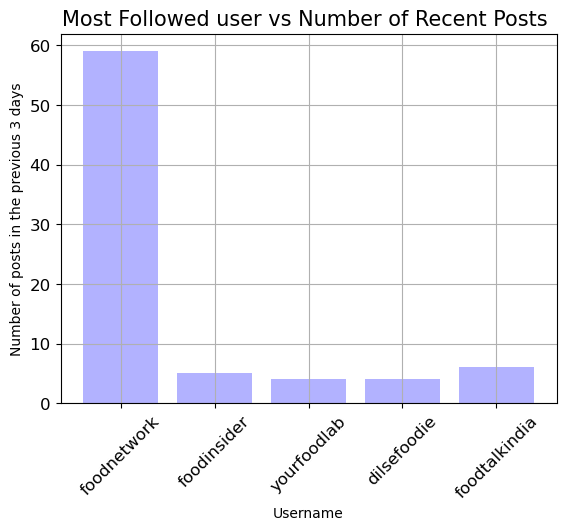

In [95]:
x = dic.keys()
y = dic.values()
plt.bar(x, y, color = 'b', alpha = 0.3)
plt.ylabel("Number of posts in the previous 3 days", size = 10)
plt.xlabel("Username", size = 10)
plt.yticks(size = 12)
plt.xticks(rotation = 45, size = 12)
plt.title('Most Followed user vs Number of Recent Posts ' ,fontsize = 15)
plt.grid()
plt.show()

Your friend also needs a list of hashtags that he should use in his posts.

Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle

Prepare a list of all words used in all the scraped posts and calculate the frequency of each word

Create a csv file with two columns : the word and its frequency

Now, find the hashtags that were most popular among these bloggers

Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts

In [103]:
# Prepare a list of all words used in all the scraped posts and calculate the frequency of each word
def content_extract(handles):
    hashtag_list = []
    index = 0
    for user in handles:
        search(user, index)
        time.sleep(2)
        driver.execute_script('window.scrollTo(0, 3000);')
        driver.implicitly_wait(2)
        driver.execute_script('window.scrollTo(0, -3000);')
        driver.implicitly_wait(2)
        posts = driver.find_elements(By.CLASS_NAME, '_aagw')
        for post in posts:
            post.click()
            time.sleep(2)
            hashtags = driver.find_elements(By.CLASS_NAME, 'x1i10hfl.xjbqb8w.x6umtig.x1b1mbwd.xaqea5y.xav7gou.x9f619.x1ypdohk.xt0psk2.xe8uvvx.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.xexx8yu.x4uap5.x18d9i69.xkhd6sd.x16tdsg8.x1hl2dhg.xggy1nq.x1a2a7pz._aa9_._a6hd')
            for hashtag in hashtags:
                hashtag_list.append(hashtag.text)
            close = driver.find_element(By.XPATH, '/html/body/div[2]/div/div/div/div[2]/div/div/div[1]/div/div[2]/div')
            close.click()
        index = 1
    return hashtag_list

In [104]:
handles = ['foodnetwork', 'foodinsider', 'yourfoodlab', 'dilsefoodie', 'foodtalkindia']
hashtags_list = content_extract(handles)

In [105]:
print(hashtags_list)

['#SuperchefGrudgeMatch', '#GuysRanchKitchen', '#KidsBakingChampionship', '#DDD', '#Chopped', '#Chopped', '#discoveryplus', '#SuperchefGrudgeMatch', '#DDD', '#MaryMakesItEasy', '#FoodNetworkObsessed', '#TournamentOfChampions', '#LFG', '#insiderfood', '#india', '#bread', '#howitsmade', '#fuddhascore', '#SushiTerrorism', '#Sushi', '#Japan', '#chickfila', '#plantbased', '#fastfood', '#chikFilHate', '#sideOfBigotry', '#SuperBowl', '#MexicanPizza', '#TacoBell', '#eagles', '#football', '#athletemeals', '#lanejohnson', '#superbowl', '#Japan', '#Sushi', '#SushiTerror', '#TheLastofUs', '#TLOU', '#wine', '#mcdonalds', '#travel', '#mcflurries', '#NancyPelosi', '#HotDogs', '#Food', '#Politics', '#pasta', '#recipes', '#GordonRamsay', '#quickmeals', '#EmilyInParis', '#Netflix', '#Food', '#Travel', '#yourfoodlab', '#thatteidli', '#foodporn', '#sanjyotkeer', '#yourfoodlab', '#railwaycutlets', '#sanjyotkeer', '#foodporn', '#yourfoodlab', '#sanjyotkeer', '#chickenkalimirchtikka', '#foodporn', '#yourfood

In [106]:
# Return to the home page
driver.find_element(By.CLASS_NAME, '_aacl._aacp._aacu._aacx._aada').click()

In [107]:
dic = {}
words_list = []
for word in hashtags_list:
    dic[word] = dic.get(word, 0) + 1
    
for i in sorted(dic, key = dic.get, reverse = True):
    words_list.append([i, dic[i]])
    print(i, dic[i])

#foodtalkindia 14
#dilsefoodie 12
#dilsecouple 12
#foodiesofindia 12
#foodblogger 12
#delicious 12
#yummy 12
#instafood 12
#discover 12
#food 11
#foodie 9
#delhi 5
#yourfoodlab 4
#foodporn 4
#sanjyotkeer 4
#vday 3
#NewInTown 3
#jamieolivers 3
#valentinesday 3
#SuperchefGrudgeMatch 2
#DDD 2
#Chopped 2
#Sushi 2
#Japan 2
#wine 2
#Food 2
#goanfish 2
#momos 2
#galentinesday 2
#nowopen 2
#GiveawayAlert 2
#giveaway 2
#ContestGiveaway 2
#drinks 2
#GuysRanchKitchen 1
#KidsBakingChampionship 1
#discoveryplus 1
#MaryMakesItEasy 1
#FoodNetworkObsessed 1
#TournamentOfChampions 1
#LFG 1
#insiderfood 1
#india 1
#bread 1
#howitsmade 1
#fuddhascore 1
#SushiTerrorism 1
#chickfila 1
#plantbased 1
#fastfood 1
#chikFilHate 1
#sideOfBigotry 1
#SuperBowl 1
#MexicanPizza 1
#TacoBell 1
#eagles 1
#football 1
#athletemeals 1
#lanejohnson 1
#superbowl 1
#SushiTerror 1
#TheLastofUs 1
#TLOU 1
#mcdonalds 1
#travel 1
#mcflurries 1
#NancyPelosi 1
#HotDogs 1
#Politics 1
#pasta 1
#recipes 1
#GordonRamsay 1
#quickmeals 1

In [108]:
df = pd.DataFrame(words_list, columns = ['Words', 'Frequency'])
df.to_csv('Words_Frequency.csv', index = False)
# Print top 10 hashtags (in the order of frequency)
df.head(10)

,Words,Frequency
0,#foodtalkindia,14
1,#dilsefoodie,12
2,#dilsecouple,12
3,#foodiesofindia,12
4,#foodblogger,12
5,#delicious,12
6,#yummy,12
7,#instafood,12
8,#discover,12
9,#food,11


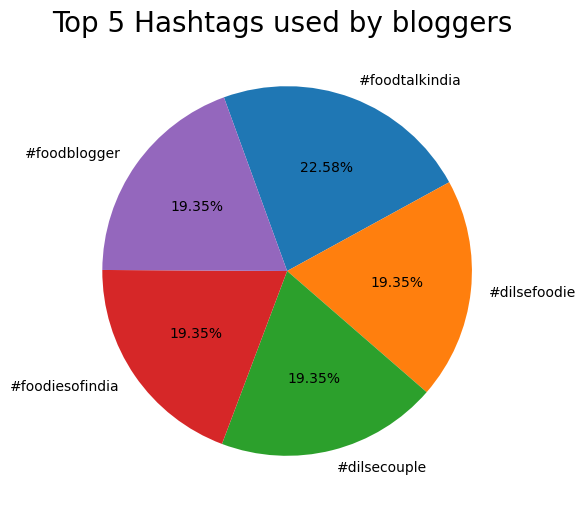

In [109]:
hashtag_name = [words_list[0][0], words_list[1][0], words_list[2][0], words_list[3][0], words_list[4][0]]
count = [words_list[0][1], words_list[1][1], words_list[2][1], words_list[3][1], words_list[4][1]]
plt.figure(figsize = (12, 6))
plt.pie(count, labels = hashtag_name, autopct = '%0.2f%%', radius = 1, counterclock = False, startangle = 110)
plt.title('Top 5 Hashtags used by bloggers ', fontsize = 20)
plt.show()

You need to also calculate average followers : likes ratio for the obtained handles.

Followers : Likes ratio is calculated as follows:

Find out the likes of the top 10 posts of the 5 handles obtained earlier.

Calculate the average likes for a handle.

Divide the average likes obtained from the number of followers of the handle to get the average followers : like ratio of each handle.

Create a bar graph to depict the above obtained information.

In [110]:
# finding likes for top 10 posts of each handle
def likes_get(user, index):
    likes = []
    search(user, index)
    time.sleep(2)
    driver.execute_script('window.scrollTo(0, 3000);')
    driver.implicitly_wait(2)
    driver.execute_script('window.scrollTo(0, -3000);')
    driver.implicitly_wait(2)
    posts = driver.find_elements(By.CLASS_NAME, '_aagw')
    for post in posts[:10]:
        post.click()
        time.sleep(2)
        like = driver.find_element(By.XPATH, '/html/body/div[2]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/div/a/div/span')
        like_text = (like.text).replace(',', '')
        likes.append(int(like_text))
        close = driver.find_element(By.XPATH, '/html/body/div[2]/div/div/div/div[2]/div/div/div[1]/div/div[2]/div')
        close.click()
    return likes

In [111]:
handles = ['foodnetwork', 'foodinsider', 'yourfoodlab', 'dilsefoodie', 'foodtalkindia']
dic = {}

index = 0
for user in handles:
    likes = likes_get(user, index)
    dic[user] = likes
    index = 1
    print('Number of likes of the recent 10 posts of', user, ':')
    for i in likes:
        print(i, 'Likes')
    print()

Number of likes of the recent 10 posts of foodnetwork :
236 Likes
1021 Likes
1910 Likes
868 Likes
2784 Likes
1464 Likes
1695 Likes
2025 Likes
7571 Likes
2692 Likes

Number of likes of the recent 10 posts of foodinsider :
1456 Likes
3570 Likes
15361 Likes
8819 Likes
10427 Likes
18131 Likes
4689 Likes
6268 Likes
12192 Likes
57462 Likes

Number of likes of the recent 10 posts of yourfoodlab :
45098 Likes
39127 Likes
36498 Likes
26868 Likes
25239 Likes
21736 Likes
11251 Likes
29438 Likes
24728 Likes
5983 Likes

Number of likes of the recent 10 posts of dilsefoodie :
10272 Likes
5021 Likes
5335 Likes
8398 Likes
10119 Likes
17645 Likes
19280 Likes
14461 Likes
12081 Likes
10158 Likes

Number of likes of the recent 10 posts of foodtalkindia :
121 Likes
468 Likes
294 Likes
274 Likes
408 Likes
365 Likes
397 Likes
330 Likes
547 Likes
305 Likes



In [112]:
# Return to the home page
driver.find_element(By.CLASS_NAME, '_aacl._aacp._aacu._aacx._aada').click()

In [113]:
# finding average likes for each handle
avg_likes = {}

for key, val in dic.items():
    avg = sum(val) // 10
    avg_likes[key] = avg

print('The average likes for the handles are : ')
for users, likes in avg_likes.items():
    print(users, ':', likes)

The average likes for the handles are : 
foodnetwork : 2226
foodinsider : 13837
yourfoodlab : 26596
dilsefoodie : 11277
foodtalkindia : 350


In [114]:
# number of followers for top 5 handles
print(result)

OrderedDict([('foodnetwork', 12756561), ('foodinsider', 2523722), ('yourfoodlab', 2328830), ('dilsefoodie', 1076603), ('foodtalkindia', 309312)])


In [115]:
# number of average likes for top 5 handles
print(avg_likes)

{'foodnetwork': 2226, 'foodinsider': 13837, 'yourfoodlab': 26596, 'dilsefoodie': 11277, 'foodtalkindia': 350}


In [116]:
# finding Average Followers : Like Ratio (of each handle)
like_ratio = {}

for i in range(5):
    like_ratio[list(result.keys())[i]] = result[list(result.keys())[i]] // avg_likes[list(result.keys())[i]]

print('Average Followers : Like Ratio (of each handle) : ')
for user, ratio in like_ratio.items():
    print(user, ':', ratio)

Average Followers : Like Ratio (of each handle) : 
foodnetwork : 5730
foodinsider : 182
yourfoodlab : 87
dilsefoodie : 95
foodtalkindia : 883


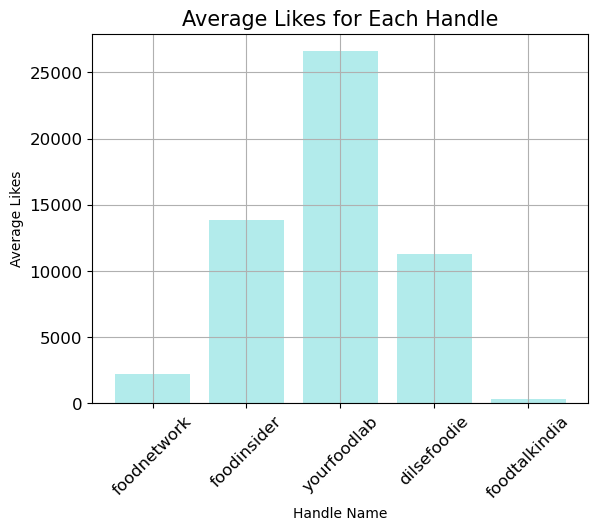

In [117]:
# plot of average likes for each handle
user_name = list(avg_likes.keys())
avg_like = list(avg_likes.values())

plt.bar(user_name, avg_like, color = 'c', alpha = 0.3)
plt.ylabel("Average Likes", size = 10)
plt.xlabel("Handle Name", size = 10)
plt.yticks(size = 12)
plt.xticks(rotation = 45, size = 12)
plt.title('Average Likes for Each Handle', fontsize = 15)
plt.grid()
plt.show()

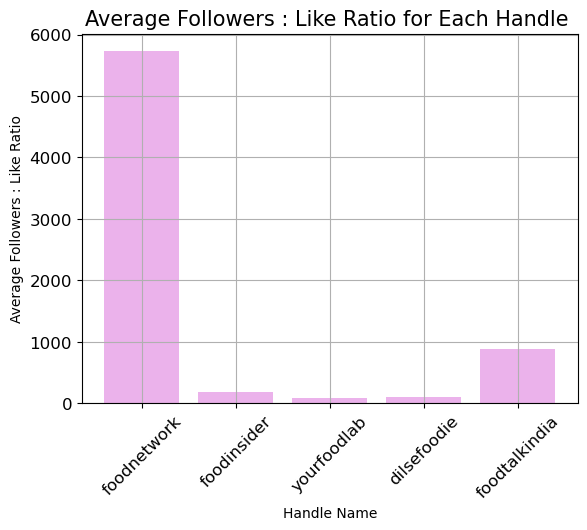

In [118]:
# plot of Average Followers : Like Ratio (of each handle)
user_name = list(like_ratio.keys())
avg_like = list(like_ratio.values())

plt.bar(user_name, avg_like, color = 'm', alpha = 0.3)
plt.ylabel("Average Followers : Like Ratio", size = 10)
plt.xlabel("Handle Name", size = 10)
plt.yticks(size = 12)
plt.xticks(rotation = 45, size = 12)
plt.title('Average Followers : Like Ratio for Each Handle ', fontsize = 15)
plt.grid()
plt.show()